# **Proyek Klasifikasi Gambar**
## **Data Diri**
- **Nama:** Meakhel Gunawan
- **Kampus:** Universitas Negeri Surabaya Teknik Informatika (Semester 6)
- **Email:** meakhel220504@gmail.com
- **ID Dicoding:** meakhelg
- **Dataset:** https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset

# <font color='yellow'> **Import Library**</font>

In [1]:
!pip install -q kaggle

In [2]:
!pip install split-folders

In [3]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 24.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


In [4]:
from google.colab import userdata
import zipfile, os
from PIL import Image
import splitfolders
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
import tensorflowjs as tfjs
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

#  <font color='yellow'> **Download Dataset dari Kaggle**</font>




In [5]:
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [6]:
!kaggle datasets download -d borhanitrash/animal-image-classification-dataset
! unzip animal-image-classification-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset
License(s): MIT
 81% 31.0M/38.4M [00:00<00:00, 96.5MB/s]
100% 38.4M/38.4M [00:00<00:00, 85.1MB/s]
Archive:  animal-image-classification-dataset.zip
  inflating: Animals/cats/0_0001.jpg  
  inflating: Animals/cats/0_0002.jpg  
  inflating: Animals/cats/0_0003.jpg  
  inflating: Animals/cats/0_0004.jpg  
  inflating: Animals/cats/0_0005.jpg  
  inflating: Animals/cats/0_0006.jpg  
  inflating: Animals/cats/0_0007.jpg  
  inflating: Animals/cats/0_0008.jpg  
  inflating: Animals/cats/0_0009.jpg  
  inflating: Animals/cats/0_0010.jpg  
  inflating: Animals/cats/0_0011.jpg  
  inflating: Animals/cats/0_0012.jpg  
  inflating: Animals/cats/0_0013.jpg  
  inflating: Animals/cats/0_0014.jpg  
  inflating: Animals/cats/0_0015.jpg  
  inflating: Animals/cats/0_0016.jpg  
  inflating: Animals/cats/0_0017.jpg  
  inflating: Animals/cats/0_0018.jpg  
  inflating: Animals/cats/0_0019.jpg  
  inflating: Anim

#  <font color='yellow'> **Data Preparation**</font>

In [7]:
def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images}")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            with Image.open(img_path) as img:
                unique_sizes.add(img.size)

        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

    print(f"\nTotal: {total_images}")

print_images_resolution('/content/Animals')

snakes: 1000
- (256, 256)
---------------
cats: 1000
- (256, 256)
---------------
dogs: 1000
- (256, 256)
---------------

Total: 3000


In [8]:
# Path folder dataset asal
input_folder = "/content/Animals"

# Output folder untuk dataset yang sudah dibagi
output_folder = "/content/Animals Classification"

# Membagi dataset dengan rasio 80% train, 10% test, 10% val
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.1, 0.1), group_prefix=None, move=False)

print("\n Dataset berhasil dibagi ke dalam train, test, dan val!")

Copying files: 3000 files [00:01, 2474.47 files/s]


 Dataset berhasil dibagi ke dalam train, test, dan val!


In [9]:
os.listdir("/content/Animals Classification")

['train', 'test', 'val']

In [10]:
os.listdir("/content/Animals Classification/train")

['snakes', 'cats', 'dogs']

In [11]:
os.listdir("/content/Animals Classification/test")

['snakes', 'cats', 'dogs']

In [12]:
os.listdir("/content/Animals Classification/val")

['snakes', 'cats', 'dogs']

In [13]:
# Path ke dataset yang sudah dibagi
train_dir = "/content/Animals Classification/train"
test_dir = "/content/Animals Classification/test"
val_dir = "/content/Animals Classification/val"

# Data Augmentation untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalisasi pixel (0-255 menjadi 0-1)
    rotation_range=20,     # Rotasi gambar hingga 20 derajat
    width_shift_range=0.2, # Pergeseran horizontal
    height_shift_range=0.2,# Pergeseran vertikal
    shear_range=0.2,       # Distorsi bentuk gambar
    zoom_range=0.2,        # Zoom in/out gambar
    horizontal_flip=True,  # Membalik gambar secara horizontal
    fill_mode='nearest'    # Mengisi piksel kosong dengan metode 'nearest'
)

# Generator untuk validation dan test (tanpa augmentasi)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Sesuai dengan ukuran input model
    batch_size=32,
    class_mode='categorical'  # Karena lebih dari 2 kelas
)

# Validation Generator
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Karena lebih dari 2 kelas
)

# Test Generator
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Karena lebih dari 2 kelas
    shuffle=False  # Tidak perlu diacak untuk evaluasi
)

Found 2400 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


#  <font color='yellow'> **Modelling**</font>

In [14]:
# Load MobileNetV2 tanpa top layers, sebagai feature extractor
base_model = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(150,150,3))
base_model.trainable = False

# Membangun model dengan tambahan Conv2D & Pooling setelah feature extractor
model = keras.Sequential([
    base_model,  # MobileNetV2 sebagai backbone

    # Tambahkan extra Conv2D & Pooling untuk lebih banyak fitur
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),

    # Global Average Pooling untuk mengurangi dimensi
    layers.GlobalAveragePooling2D(),

    # Fully Connected Layers (Dense)
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.7),
    layers.Dense(3, activation='softmax')  # Output 3 kelas
])

# Compile Model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

<ipython-input-14-32659f372358>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(150,150,3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
# Callback untuk menghentikan training jika akurasi > 95% pada training dan validation
class EarlyStopping_95(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
            print(f"\nAkurasi telah mencapai 95% pada epoch {epoch+1}, menghentikan training...")
            self.model.stop_training = True

# Inisialisasi callback
callbacks = EarlyStopping_95()

In [16]:
history = model.fit(
      train_generator,
      epochs=30,
      validation_data=val_generator,
      validation_steps=5,
      verbose=2,
      callbacks=[callbacks]
      )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
75/75 - 28s - 375ms/step - accuracy: 0.6087 - loss: 0.8787 - val_accuracy: 0.9312 - val_loss: 0.1824
Epoch 2/30
75/75 - 18s - 246ms/step - accuracy: 0.8562 - loss: 0.3651 - val_accuracy: 0.9312 - val_loss: 0.1512
Epoch 3/30
75/75 - 16s - 215ms/step - accuracy: 0.9083 - loss: 0.2489 - val_accuracy: 0.9563 - val_loss: 0.1267
Epoch 4/30
75/75 - 20s - 273ms/step - accuracy: 0.9217 - loss: 0.2150 - val_accuracy: 0.9688 - val_loss: 0.0962
Epoch 5/30
75/75 - 21s - 274ms/step - accuracy: 0.9254 - loss: 0.2070 - val_accuracy: 0.9688 - val_loss: 0.0864
Epoch 6/30
75/75 - 20s - 272ms/step - accuracy: 0.9325 - loss: 0.1941 - val_accuracy: 0.9625 - val_loss: 0.0828
Epoch 7/30
75/75 - 14s - 185ms/step - accuracy: 0.9442 - loss: 0.1621 - val_accuracy: 0.9812 - val_loss: 0.0647
Epoch 8/30
75/75 - 20s - 273ms/step - accuracy: 0.9454 - loss: 0.1497 - val_accuracy: 0.9812 - val_loss: 0.0346
Epoch 9/30
75/75 - 34s - 451ms/step - accuracy: 0.9463 - loss: 0.1582 - val_accuracy: 0.9500 - val_loss:

In [17]:
# Ringkasan Model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 5, 5, 32)            │         368,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 2, 2, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,445,611 (13.14 MB)

 Trainable params: 395,875 (1.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 791,752 (3.02 MB)

#  <font color='yellow'> **Evaluasi dan Visualisasi**</font>

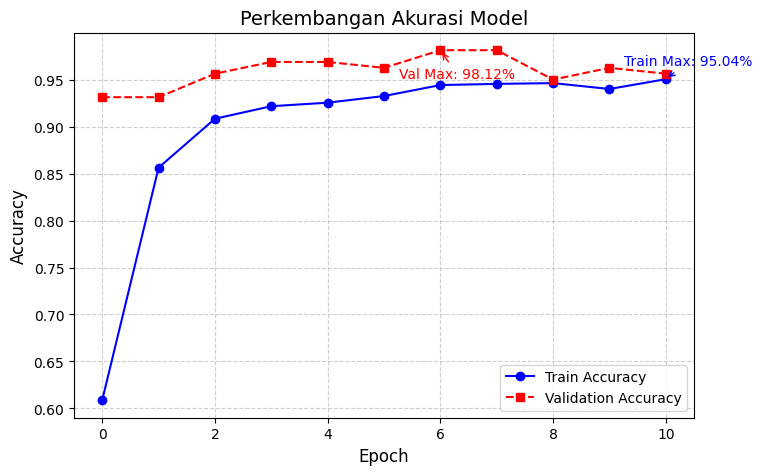

Akurasi terbaik model: 95.04% pada training dan 98.12% pada validation.


In [18]:
# Plot akurasi
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue', linestyle='solid', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='dashed', marker='s')

# Tambahkan title dan label
plt.title("Perkembangan Akurasi Model", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Tambahkan grid untuk memperjelas pola
plt.grid(True, linestyle="--", alpha=0.6)

# Tambahkan legenda
plt.legend(loc='lower right')

# Cari akurasi terbaik
best_train_acc = max(history.history['accuracy'])
best_val_acc = max(history.history['val_accuracy'])

# Tambahkan anotasi akurasi terbaik pada grafik
plt.annotate(f"Train Max: {best_train_acc:.2%}",
             xy=(history.history['accuracy'].index(best_train_acc), best_train_acc),
             xytext=(-30, 10), textcoords="offset points",
             arrowprops=dict(arrowstyle="->", color="blue"), color="blue")

plt.annotate(f"Val Max: {best_val_acc:.2%}",
             xy=(history.history['val_accuracy'].index(best_val_acc), best_val_acc),
             xytext=(-30, -20), textcoords="offset points",
             arrowprops=dict(arrowstyle="->", color="red"), color="red")

# Tampilkan plot
plt.show()

# Tampilkan akurasi terbaik
print(f"Akurasi terbaik model: {best_train_acc:.2%} pada training dan {best_val_acc:.2%} pada validation.")

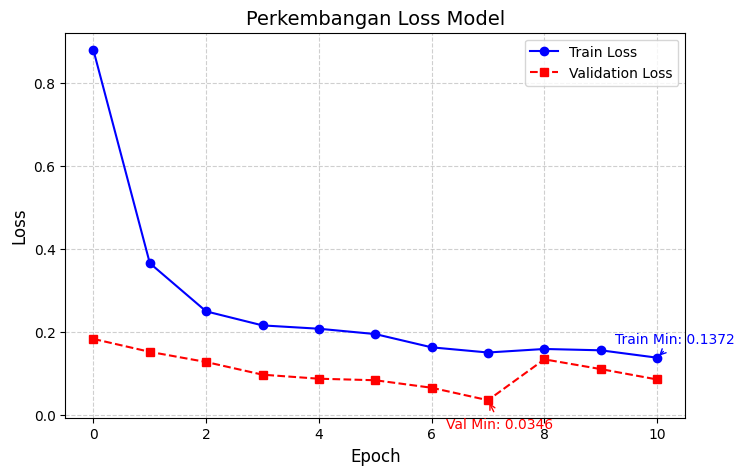

Loss terbaik model: 0.1372 pada training dan 0.0346 pada validation.


In [19]:
# Plot loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss', color='blue', linestyle='solid', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='dashed', marker='s')

# Tambahkan title dan label
plt.title("Perkembangan Loss Model", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)

# Tambahkan grid untuk memperjelas pola
plt.grid(True, linestyle="--", alpha=0.6)

# Tambahkan legenda
plt.legend(loc='upper right')

# Cari loss terbaik (terendah)
best_train_loss = min(history.history['loss'])
best_val_loss = min(history.history['val_loss'])

# Tambahkan anotasi loss terendah pada grafik
plt.annotate(f"Train Min: {best_train_loss:.4f}",
             xy=(history.history['loss'].index(best_train_loss), best_train_loss),
             xytext=(-30, 10), textcoords="offset points",
             arrowprops=dict(arrowstyle="->", color="blue"), color="blue")

plt.annotate(f"Val Min: {best_val_loss:.4f}",
             xy=(history.history['val_loss'].index(best_val_loss), best_val_loss),
             xytext=(-30, -20), textcoords="offset points",
             arrowprops=dict(arrowstyle="->", color="red"), color="red")

# Tampilkan plot
plt.show()

# Tampilkan loss terbaik
print(f"Loss terbaik model: {best_train_loss:.4f} pada training dan {best_val_loss:.4f} pada validation.")

#  <font color='yellow'> **Konversi Model (Menyimpan Model)**</font>

In [20]:
# Menyimpan Model dalam Format SavedModel
model.save("model.keras")  # Format default Keras 3
model.save("model.h5")
model.export("model_saved")

Saved artifact at 'model_saved'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  139393907224464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139393907226384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139393907224272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139393907225040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139393907226960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139393907227152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139393907226768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139393907227728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139393907227344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139393907224080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139393907224656

In [21]:
# Mengonversi ke Format TensorFlow Lite (TFLite)
converter = tf.lite.TFLiteConverter.from_saved_model("model_saved")
tflite_model = converter.convert()

# Simpan model TF-Lite ke file .tflite
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

In [22]:
# Mengonversi ke Format TensorFlow.js (TFJS)
tfjs.converters.save_keras_model(model, "model_tfjs")

failed to lookup keras version from the file,
    this is likely a weight only file


#  <font color='yellow'> **Inference atau Testing**</font>

In [23]:
# Load model dari file
model = tf.keras.models.load_model("model.keras")  # Sesuaikan dengan lokasi file model

In [24]:
class_labels = ["Kucing", "Anjing", "Ular"]

Bentuk Folder (Animals Classification/test/)

In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "/content/Animals Classification/test",  # Sesuaikan dengan lokasi dataset uji
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Akurasi model pada dataset uji: {test_acc * 100:.2f}%")

Found 300 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - accuracy: 0.9663 - loss: 0.1127
Akurasi model pada dataset uji: 96.33%


Bentuk Upload Gambar

In [26]:
# Unggah file gambar dari komputer
uploaded = files.upload()

# Ambil nama file yang diunggah
image_path = list(uploaded.keys())[0]
print(f"Gambar yang diunggah: {image_path}")

# Fungsi prediksi gambar
def predict_uploaded_image(image_path, model, target_size=(150, 150)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalisasi

    # Prediksi
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    return predicted_label, prediction

# Lakukan prediksi
predicted_label, prediction = predict_uploaded_image(image_path, model)
print(f"Prediksi kelas: {predicted_label}, Probabilitas: {prediction}")

Saving Kucing.jpg to Kucing.jpg
Gambar yang diunggah: Kucing.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Prediksi kelas: Kucing, Probabilitas: [[9.9903882e-01 6.4319267e-04 3.1792652e-04]]


In [27]:
# Unggah file gambar dari komputer
uploaded = files.upload()

# Ambil nama file yang diunggah
image_path = list(uploaded.keys())[0]
print(f"Gambar yang diunggah: {image_path}")

# Fungsi prediksi gambar
def predict_uploaded_image(image_path, model, target_size=(150, 150)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalisasi

    # Prediksi
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    return predicted_label, prediction

# Lakukan prediksi
predicted_label, prediction = predict_uploaded_image(image_path, model)
print(f"Prediksi kelas: {predicted_label}, Probabilitas: {prediction}")

Saving Anjing.jpg to Anjing.jpg
Gambar yang diunggah: Anjing.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediksi kelas: Anjing, Probabilitas: [[0.00161646 0.9973755  0.00100801]]


In [28]:
# Unggah file gambar dari komputer
uploaded = files.upload()

# Ambil nama file yang diunggah
image_path = list(uploaded.keys())[0]
print(f"Gambar yang diunggah: {image_path}")

# Fungsi prediksi gambar
def predict_uploaded_image(image_path, model, target_size=(150, 150)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalisasi

    # Prediksi
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    return predicted_label, prediction

# Lakukan prediksi
predicted_label, prediction = predict_uploaded_image(image_path, model)
print(f"Prediksi kelas: {predicted_label}, Probabilitas: {prediction}")

Saving Ular.jpg to Ular.jpg
Gambar yang diunggah: Ular.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediksi kelas: Ular, Probabilitas: [[1.7855031e-08 2.4939293e-09 1.0000000e+00]]
